In [1]:
## Step 1: Import Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor

In [2]:
## Step 2: Data Collection
ticker = "AAPL"
data = yf.download(ticker, start="2024-08-01", end="2024-12-16")  # Dec 16 for Dec 15 prediction
data = data[["Open", "High", "Low", "Close", "Volume"]]
data.dropna(inplace=True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


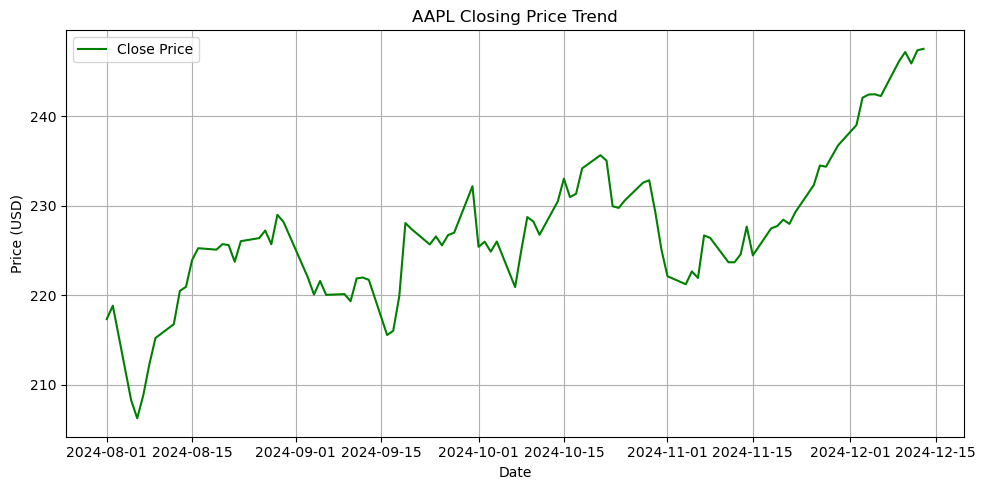

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(data.index, data["Close"], label="Close Price", color='green')
plt.title(f"{ticker} Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
import seaborn as sns


In [5]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


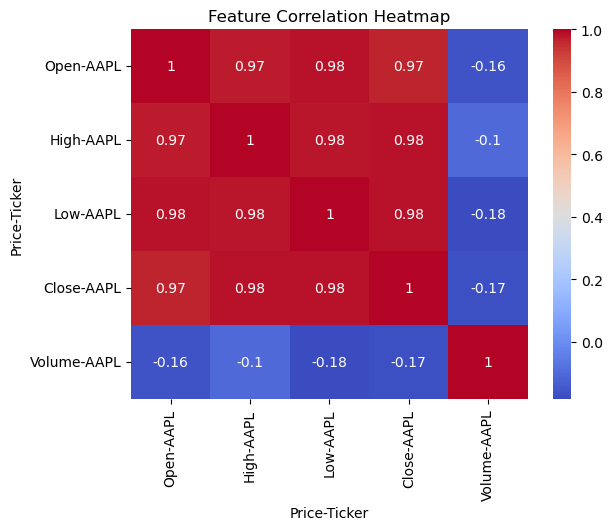

In [6]:
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
 # Data Preprocessing
data["Date"] = data.index
data.reset_index(drop=True, inplace=True)
features = ["Open", "High", "Low", "Volume"]
target = "Close"

In [10]:
# Normalize features
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[features])
data_scaled = pd.DataFrame(data_scaled, columns=features)
data_scaled[target] = data["Close"].values

In [11]:
train_data = data_scaled[:len(data_scaled)-11]
test_data = data_scaled[-11:]

In [12]:
# Train on August to November
train_data = data_scaled[:len(data_scaled)-11]  # up to Nov 30
X_train = train_data[features]
y_train = train_data[target]

In [13]:
# Predict for Dec 1–15
test_data = data_scaled[-11:]
X_test = test_data[features]
y_test = test_data[target]

In [14]:
## Step 5: Model Training - XGBoost
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [15]:

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [16]:

mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

In [17]:
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 8.57
RMSE: 9.23


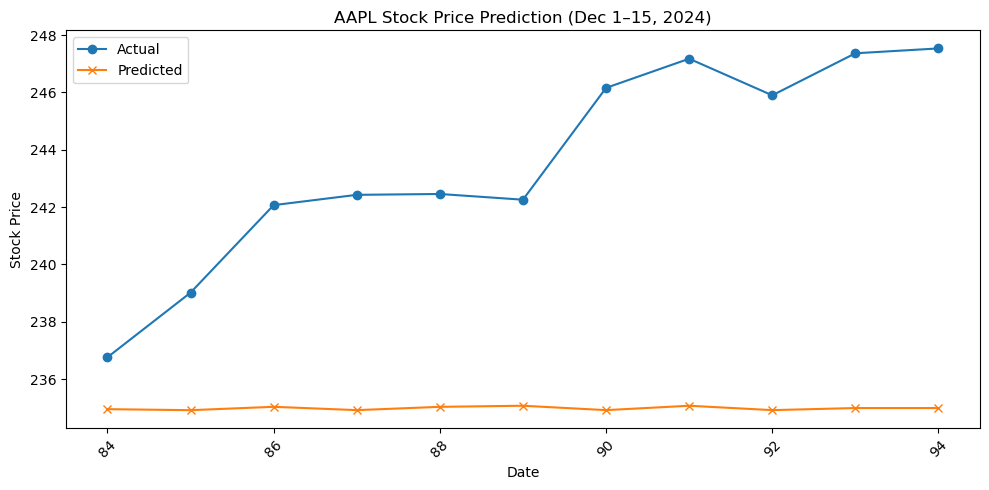

In [18]:
## Step 6: Visualization
plt.figure(figsize=(10,5))
plt.plot(data["Date"][-11:], y_test, label="Actual", marker='o')
plt.plot(data["Date"][-11:], predictions, label="Predicted", marker='x')
plt.title(f"{ticker} Stock Price Prediction (Dec 1–15, 2024)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

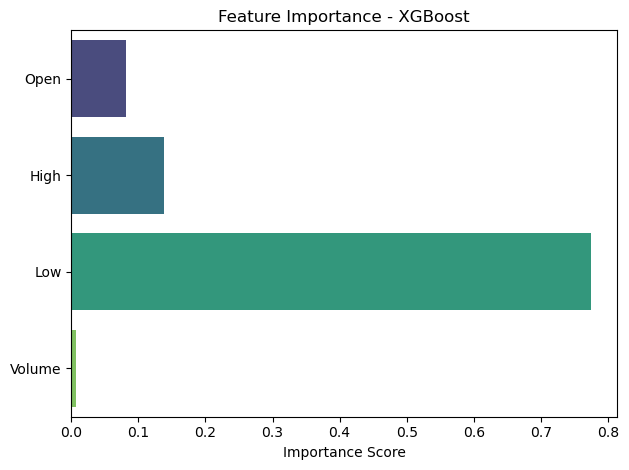

In [19]:
## Step 8: Feature Importance
importances = model.feature_importances_
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [23]:

data["Date"] = pd.to_datetime(data["Date"])
summary = pd.DataFrame({
    "Date": data["Date"][-11:].dt.strftime('%Y-%m-%d'),
    "Actual Price": y_test.values,
    "Predicted Price": predictions
})
summary


,Date,Actual Price,Predicted Price
84,1970-01-01,236.758865,234.948766
85,1970-01-01,239.013428,234.913126
86,1970-01-01,242.066071,235.030863
87,1970-01-01,242.425201,234.915004
88,1970-01-01,242.455124,235.029701
89,1970-01-01,242.255600,235.067933
90,1970-01-01,246.156204,234.915004
91,1970-01-01,247.173752,235.067933
92,1970-01-01,245.896835,234.915004
93,1970-01-01,247.363297,234.987568
